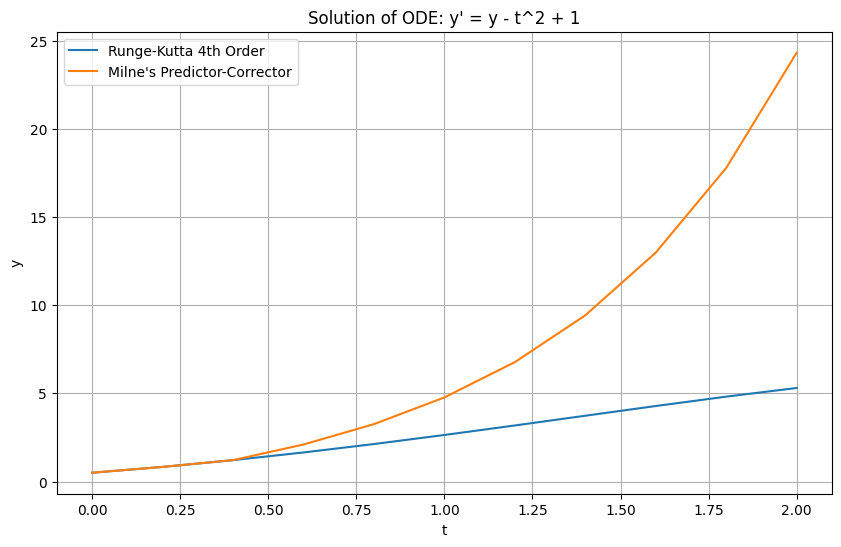

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4th_order(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn+h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_values, y_values

def milnes_predictor_corrector(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn+h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    
    for i in range(1, 4):
        t = t_values[i-1]
        y = y_values[i-1]
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    for i in range(3, len(t_values)):
        t_n3 = t_values[i-3]
        t_n2 = t_values[i-2]
        t_n1 = t_values[i-1]
        y_n3 = y_values[i-3]
        y_n2 = y_values[i-2]
        y_n1 = y_values[i-1]
        
        t = t_values[i-1]
        y_p = y_n1 + 4*h/3 * (2*f(t, y_n1) - f(t_n1, y_n2) + 2*f(t_n2, y_n3))
        t = t_values[i]
        y_values[i] = y_n1 + h/3 * (f(t, y_p) + 4*f(t_n1, y_n1) + f(t_n2, y_n2))
    
    return t_values, y_values

# Example ODE: y' = y - t^2 + 1, y(0) = 0.5
def f(t, y):
    return y - t**2 + 1

# Initial conditions
y0 = 0.5
t0 = 0
tn = 2
h = 0.2

# Solve using Runge-Kutta 4th order method
t_values_rk4, y_values_rk4 = runge_kutta_4th_order(f, y0, t0, tn, h)

# Solve using Milne's predictor-corrector method
t_values_milne, y_values_milne = milnes_predictor_corrector(f, y0, t0, tn, h)

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(t_values_rk4, y_values_rk4, label="Runge-Kutta 4th Order")
plt.plot(t_values_milne, y_values_milne, label="Milne's Predictor-Corrector")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of ODE: y\' = y - t^2 + 1')
plt.legend()
plt.grid(True)
plt.show()
